In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
np.random.seed(10)

In [ ]:
df = pd.read_csv('df_298_cleaned_filtered_1 (w_entropy).csv')



In [ ]:
columns_to_drop = ['Enthalpy_BCC', 'Enthalpy_HCP', 'G_RT_BCC', 'G_RT_HCP' , 'dG_RT_(BCC - FCC)', 'dG_RT_(HCP - FCC)', 'dG_RT_(BCC - HCP)', 'dG_AT_(BCC - FCC)', 'dG_AT_(HCP - FCC)', 'dG_AT_(BCC - HCP)', 'H_RT_BCC', 'H_RT_HCP' ]
df = df.drop(columns = columns_to_drop, axis = 1)

In [ ]:
corr_matrix = df.corr()
corr_matrix["YS(Mpa)"].sort_values(ascending = False)
#df= df.drop(columns = 'phase_fraction_hcp', axis = 1)



,YS(Mpa)
YS(Mpa),1.000000
R(%),0.475404
second_phase_fraction,0.351548
Hom_Temp(K),0.167878
Ni(at%),0.147472
Cr(at%),0.139771
CR(%),0.131447
Al(at%),0.091865
phase_fraction_bcc,0.083340
Co(at%),0.069359


In [ ]:
X_train = df.drop('YS(Mpa)', axis = 1)
y_train = df['YS(Mpa)']

In [ ]:
'''currently, mol ratios written as a percentage of the whole. Dividing by 100 and multiplying by the
molar mass gives the molar weight with respect to other elements'''

X_train['C(at%)'] = (X_train['C(at%)'] / 100) * 12.01
X_train['Co(at%)'] = (X_train['Co(at%)'] / 100) * 58.93
X_train['Al(at%)'] = (X_train['Al(at%)'] / 100) * 26.98
X_train['V(at%)'] = (X_train['V(at%)'] / 100) * 50.94
X_train['Cr(at%)'] = (X_train['Cr(at%)'] / 100) * 51.99
X_train['Mn(at%)'] = (X_train['Mn(at%)'] / 100) * 54.94
X_train['Fe(at%)'] = (X_train['Fe(at%)'] / 100) * 55.85
X_train['Ni(at%)'] = (X_train['Ni(at%)'] / 100) * 58.69
X_train['Cu(at%)'] = (X_train['Cu(at%)'] / 100) * 63.55
X_train['Mo(at%)'] = (X_train['Mo(at%)'] / 100) * 95.96

In [ ]:
X_train = X_train.rename(columns={
    'C(at%)': 'C(wt)',
    'Al(at%)': 'Al(wt)',
    'Co(at%)': 'Co(wt)',
    'V(at%)': 'V(wt)',
'Cr(at%)': 'Cr(wt)',
    'Mn(at%)': 'Mn(wt)',
    'Fe(at%)': 'Fe(wt)',
    'Ni(at%)': 'Ni(wt)',
    'Cu(at%)': 'Cu(wt)',
    'Mo(at%)': 'Mo(wt)',
    'R(%)': 'R',
    'CR(%)': 'CR'
})


In [ ]:
X_train['R'] = (X_train['R'] / 100)
X_train['CR'] = (X_train['CR'] / 100)

In [ ]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_train_normalized = pd.DataFrame(X_train_normalized)
X_train_normalized.columns = X_train.columns
X_train_normalized.head()

# y_train needs to be reshaped into a 2D array
y_train_normalized = scaler.fit_transform(y_train.values.reshape(-1, 1)) # Reshape y_train to a 2D array
y_train_normalized = pd.DataFrame(y_train_normalized) # remove unnecessary reshape
y_train_normalized.columns = ['YS(Mpa)'] # Use a list to assign column name
y_train_normalized.head()

,YS(Mpa)
0,0.145299
1,0.145299
2,0.145299
3,0.367521
4,0.367521


In [ ]:
nan_counts = X_train.isna().sum()
columns_with_nan = X_train.columns[X_train.isna().any()].tolist()

print("NaN counts per column:")
print(nan_counts)
print("\nColumns with NaN values:")
print(columns_with_nan)

NaN counts per column:
C(wt)                    0
Al(wt)                   0
V(wt)                    0
Cr(wt)                   0
Mn(wt)                   0
Fe(wt)                   0
Co(wt)                   0
Ni(wt)                   0
Cu(wt)                   0
Mo(wt)                   0
Config_Entropy           0
(0-T)*Entropy            0
Enthalpy_FCC             0
Hom_Temp(K)              0
R                        0
Anneal_Temp(K)           0
Anneal_Time(h)           0
grain(um)                0
G_RT_FCC                 0
H_RT_FCC                 0
phase_fraction_fcc       0
phase_fraction_bcc       0
phase_fraction_hcp       0
second_phase_fraction    0
CR                       0
dtype: int64

Columns with NaN values:
[]


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(X_train_normalized, y_train_normalized, test_size=0.2, random_state=42)

### Now trying with autoencoder




In [ ]:
#UnsupervisedSparseAutoencoder-3D Model
class UnsupervisedSparseAutoencoder:
    def __init__(self, hidden_dim, latent_dim, input_dim, target_sparsity = 0.05):
        self.latent_dim = latent_dim
        self.hidden_dim = hidden_dim
        self.input_dim = input_dim
        self.target_sparsity = target_sparsity
        self._build_model()

    def _build_model(self):
        # Input layer
        input_data = keras.layers.Input(shape=(self.input_dim,)) # Define an input layer
        # Adjust the input shape of the encoder_dense1 layer
        encoded = keras.layers.Dense(self.hidden_dim, activation='selu')(input_data)
        latent = keras.layers.Dense(self.latent_dim, activation='sigmoid')(encoded)

        #self.sampling = Sampling()
        decoded =  keras.layers.Dense(self.hidden_dim, activation='selu')(latent)
        output_data = keras.layers.Dense(self.input_dim, activation='sigmoid')(decoded)


        #autoencoder
        self.autoencoder = keras.Model(inputs = input_data, outputs = output_data)
        self.encoder = keras.Model(input_data, latent)

    def kl_divergence_loss(self, target_sparsity, actual_sparsity):
        return target_sparsity * tf.math.log(target_sparsity / actual_sparsity) + (1 - target_sparsity) * tf.math.log((1 - target_sparsity) / (1 - actual_sparsity))

    def sparse_loss(self, y_true, y_pred):
       # Reconstruction loss (Mean Squared Error)
        reconstruction_loss = tf.math.reduce_sum(tf.square(y_true - y_pred), axis=1)

        # Calculate the average activation of the latent layer
        actual_sparsity = tf.reduce_mean(self.encoder(y_true), axis = 0)

        #KL Loss
        kl_loss = tf.math.reduce_sum(self.kl_divergence_loss(self.target_sparsity, actual_sparsity))
        return reconstruction_loss + kl_loss


    def compile(self, optimizer='adam'):
        return self.autoencoder.compile(optimizer=optimizer, loss=self.sparse_loss)

    def fit(self, train_data, train_labels, epochs=10, batch_size=256, validation_data=(test_data, [test_data, test_labels])):
        return self.autoencoder.fit(train_data, [train_data, train_labels],
                             epochs=epochs,
                             batch_size=batch_size,
                             shuffle=False,
                             validation_data=(test_data, [test_data, test_labels]))


    def evaluate_sparsity(self, x_data):
        latent_representations = self.encoder.predict(x_data)
        sparsity = np.mean(np.abs(latent_representations) < 1e-3)
        return sparsity * 100

    def predict_latent(self, x_data):
        return self.encoder.predict(x_data)

    def decoded_ouptut(self, x_data):
        return self.autoencoder.predict(x_data)






In [ ]:
unsupervised_sparse_autoencoder = UnsupervisedSparseAutoencoder(input_dim = 25, hidden_dim = 20, latent_dim = 12, target_sparsity=0.45)

In [ ]:
unsupervised_sparse_autoencoder.compile(optimizer='adam')

In [ ]:
train_data.shape

(652, 25)

In [ ]:
print(train_labels.max())

YS(Mpa)    1.0
dtype: float64


In [ ]:
history = unsupervised_sparse_autoencoder.fit(train_data, train_data, epochs=20, batch_size=16, validation_data=(test_data, test_data))

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.7920 - val_loss: 2.4776
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2121 - val_loss: 1.6158
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4875 - val_loss: 1.2972
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2389 - val_loss: 1.2140
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1683 - val_loss: 1.1779
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1340 - val_loss: 1.1529
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1071 - val_loss: 1.1296
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0798 - val_loss: 1.1030
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0475 - val_loss: 1.0703
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0080 - val_loss: 1.0319
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9617 - val_loss: 0.9896
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9114 - val_lo

# Grid Search

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = [{'hidden_dim': [12, 16, 20],'latent_dim':[4, 8, 12], 'target_sparsity': [0.01,0.1, 0.15]}]

# Create a parameter grid iterator
grid = ParameterGrid(param_grid)

# Initialize variables to store the best model and score
best_model = None
best_loss = float('inf')
best_params = None

# Perform manual grid search
def best_params_autoencoder(parameter_grid):
  global best_loss, best_model, best_params
  for params in parameter_grid:
      print(f"Training with params: {params}")

      # Create a new model for each set of parameters
      model = UnsupervisedSparseAutoencoder(hidden_dim = params['hidden_dim'], latent_dim = params['latent_dim'], input_dim = 25, target_sparsity = params['target_sparsity'])
      model.compile(optimizer='adam')
      # Train the model
      history = model.fit(train_data, train_labels, epochs=20, batch_size=8, validation_data=(test_data, test_labels))

      # Check if history is None
      if history is not None:
          # Get the validation loss list (which could still be None if 'val_loss' is not found)
          val_loss_list = history.history.get('val_loss', None)

          # Ensure val_loss_list is not None and extract the last value
          if val_loss_list is not None:
              val_loss = val_loss_list[-1]  # Get the last validation loss value
              print(f"Validation loss from last epoch: {val_loss}")
              # Check if this model has the best performance so far
              if val_loss < best_loss:
                  best_loss = val_loss
                  best_model = model
                  best_params = params
          else:
              print("No validation loss available (val_loss_list is None).")
      else:
          print("Training did not produce a history object (history is None).")

  # Display the best results
  print(f"Best validation loss: {best_loss}")
  print(f"Best parameters: {best_params}")
  autoencoder_best_model = best_model
  return autoencoder_best_model





In [ ]:
autoencoder_best_model = best_params_autoencoder(grid)

Training with params: {'hidden_dim': 12, 'latent_dim': 4, 'target_sparsity': 0.01}
Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.7606 - val_loss: 3.5052
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1101 - val_loss: 2.3274
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1134 - val_loss: 1.7382
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6203 - val_loss: 1.4506
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3794 - val_loss: 1.3131
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2634 - val_loss: 1.2491
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2083 - val_loss: 1.2189
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1813 - val_loss: 1.2039
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1672 - val_loss: 1.1960
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1593 - val_loss: 1.1914
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1544 - val_loss

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


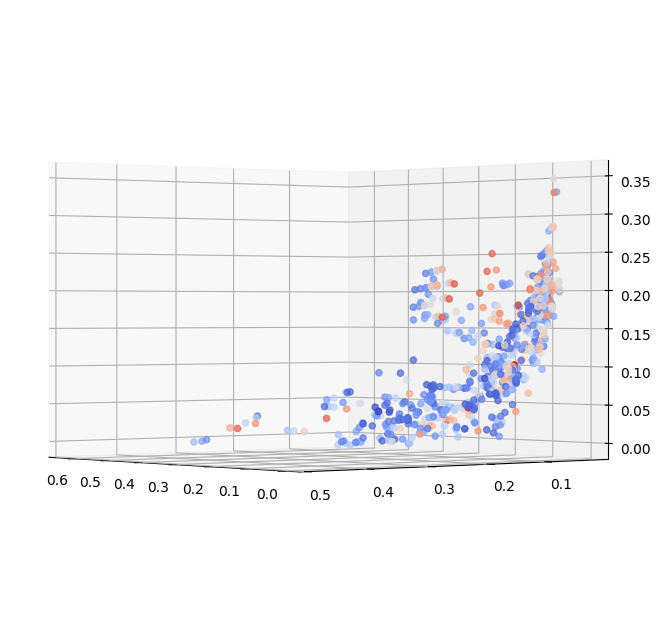

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Assuming latent_train and latent_test are the latent representations from your model
# Example of how to use these with a 3D plot:

# Extract latent representations for visualization


import plotly.express as px
latent_train = autoencoder_best_model.predict_latent(train_data)

# Convert latent_train to a DataFrame and add train_labels
latent_df = pd.DataFrame(latent_train, columns=['Latent1', 'Latent2', 'Latent3', 'Latent4', 'Latent5', 'Latent6', 'Latent7', 'Latent8'])
latent_df['Labels'] = train_labels

# Create a 3D scatter plot with a continuous color scale
'''
fig = px.scatter_3d(
    latent_df,
    x='Latent1',
    y='Latent2',
    z='Latent3',
    color='Labels',
    color_continuous_scale='Viridis'  # Choose any continuous color scale
)

fig.show()
'''
# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

#Scatter plot for training data
ax.view_init(elev=0, azim=-220)

scatter = ax.scatter(latent_train[:, 0], latent_train[:, 1], latent_train[:, 2],
                     c=train_labels, cmap='coolwarm', alpha=0.7, label='Train')




## Shap

# Regression Models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
latent_test = autoencoder_best_model.predict_latent(test_data)
latent_train = autoencoder_best_model.predict_latent(train_data)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(latent_train, train_labels )


c_predictions_test = tree_reg.predict(latent_test)

c_predictions_train = tree_reg.predict(latent_train)

#unscale predictions
predicted_scaled_yield_strength = c_predictions_test.reshape(-1, 1)
print(predicted_scaled_yield_strength.shape)
predicted_yield_strength = scaler.inverse_transform(predicted_scaled_yield_strength)
# end here

tree_mse = mean_squared_error(test_labels, c_predictions_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse



mae_test = mean_absolute_error(test_labels, c_predictions_test)
mae_train = mean_absolute_error(train_labels, c_predictions_train)

print("mae_test", mae_test)
print("mae_train", mae_train)


print("R2_train", r2_score(train_labels, c_predictions_train))
print("R2_test", r2_score(test_labels, c_predictions_test))


tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_data, train_labels )


predict_original_train = tree_reg.predict(train_data)
predict_original_test = tree_reg.predict(test_data)

print("R2_if_original", r2_score(train_labels, predict_original_train))
print("R2_if_original", r2_score(test_labels, predict_original_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(164, 1)
mae_test 0.12031651726773676
mae_train 0.00017128974184188952
R2_train 0.9998103443035916
R2_test 0.302493589945555
R2_if_original 0.9998103443035916
R2_if_original 0.8619871748238455


In [ ]:
# Import libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

unsupervised_sparse_autoencoder = UnsupervisedSparseAutoencoder(input_dim = 25, hidden_dim = 20, latent_dim = 12, target_sparsity=0.45)

# Extract latent representations
latent_train = unsupervised_sparse_autoencoder.encoder.predict(train_data)
latent_test = unsupervised_sparse_autoencoder.encoder.predict(test_data)

# Scale the latent features
#scaler = StandardScaler()
scaler = RobustScaler()
latent_train_scaled = scaler.fit_transform(latent_train)
latent_test_scaled = scaler.transform(latent_test)

# Define parameter grid
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors': range(1, 51, 2),  # Test odd values from 1 to 49
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]  # For Minkowski metric with different powers
}


# Grid search on latent data
grid_search_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search_knn.fit(latent_train_scaled, train_labels)
best_knn = grid_search_knn.best_estimator_
print("Best KNN Hyperparameters:", grid_search_knn.best_params_)





In [ ]:
# Evaluate best model on latent data

knn_predictions_test = best_knn.predict(latent_test_scaled)

print("\nBest KNN Regression Performance on Latent Test Data:")
print("MSE:", mean_squared_error(test_labels, knn_predictions_test))
print("RMSE:", np.sqrt(mean_squared_error(test_labels, knn_predictions_test)))
print("MAE:", np.mean(np.abs(test_labels - knn_predictions_test)))
print("R²:", r2_score(test_labels, knn_predictions_test))

In [ ]:
# - - - - - - -  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Step 2: Compute Permutation Importances
result = permutation_importance(
    estimator=best_knn,
    X=latent_test_scaled,
    y=test_labels,
    n_repeats=60,
    random_state=42,
    scoring='r2'
)
importances = result.importances_mean
std = result.importances_std

# Step 3: Interpret and Visualize
num_latent_features = latent_train_scaled.shape[1]
latent_feature_names = [f'Latent Feature {i+1}' for i in range(num_latent_features)]

# Create DataFrame
feature_importances = pd.DataFrame({
    'Feature': latent_feature_names,
    'Importance': importances,
    'Std': std
})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Print feature importances
print("Permutation Feature Importances:")
print(feature_importances)

# Plot importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], xerr=feature_importances['Std'])
plt.xlabel('Permutation Importance (Decrease in R²)')
plt.title('Feature Importances for KNN Regressor')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

'''
Now map Latent Features Back to Original Features
To understand how original features contribute to important latent features:

Inspect Encoder Weights: Analyze the weights of the encoder to see how original features map to latent features.
Correlation Analysis: Compute the correlation between original features and important latent features.
'''
# Get encoder weights
encoder_weights = autoencoder_best_model.encoder.get_weights()[0]  # Assuming the first weight matrix

# Extract weights corresponding to important latent features
top_k = 5  # Example: Analyze the top 5 features
important_latent_indices = feature_importances.index[:top_k]  # Indices of top k important latent features
important_weights = encoder_weights[:, important_latent_indices]

# Create a DataFrame
# original_feature_names = [...]  # List of original feature names - This was incomplete
original_feature_names = train_data.columns # Get the columns from the original dataframe
weights_df = pd.DataFrame(important_weights, index=original_feature_names, columns=[latent_feature_names[i] for i in important_latent_indices])

print("Weights from Original Features to Important Latent Features:")
print(weights_df)

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Scale original data
scaler_orig = scaler
train_data_scaled = scaler_orig.fit_transform(train_data)
test_data_scaled = scaler_orig.transform(test_data)

# Grid search on original data
grid_search_knn_orig = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search_knn_orig.fit(train_data_scaled, train_labels)
best_knn_orig = grid_search_knn_orig.best_estimator_
print("\nBest KNN Hyperparameters on Original Data:", grid_search_knn_orig.best_params_)

# Evaluate best model on original data
knn_orig_predictions_test = best_knn_orig.predict(test_data_scaled)


print("\nBest KNN Regression Performance on Latent Test Data:")
print("MSE:", mean_squared_error(test_labels, knn_predictions_test))
print("RMSE:", np.sqrt(mean_squared_error(test_labels, knn_predictions_test)))
print("MAE:", np.mean(np.abs(test_labels - knn_predictions_test)))
print("R²:", r2_score(test_labels, knn_predictions_test))
